## CT5135 Research Topics in AI 2022-2023

## Assignment 2

* Student ID(s): 22220805, 22222806, 22210643
* Student name(s): Soumitra Koustubh Manavi, Jash Prakash Rana, Pratik Anil Rahood

## Analysis of the problem 

In this assignment the goal is to build network like a **Convolutional Neural Network (CNN)**. The difference is that instead of a Convolution layer in a CNN, you have to introduce a new layer where each time a new partially shared kernel calculates weight sum. The below image shows the proposed model with a weight matrix equal to input image size. The weight kernel updates the weighted value for all neurons. Whereas in CNN layer, weight kernel like 3x3 slides over whole input image to generate output feature map.</br>

To build proposed model the difference is in weight kernel and weight matrix. CNN has a kernel that is slided over the whole input image shape. A weight matrix from which each time a locally position oriented kernel is used for calculating the weighted sum operation for proposed model.

![image.png](attachment:image.png)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import os, datetime
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import cv2

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, ReLU, Softmax, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(101)
tf.random.set_seed(101)

### Utility functions (OpenCV): 

load_images : checks the image dimensions and adds valid images </br>
Ref: https://learnopencv.com/read-display-and-write-an-image-using-opencv/

resize_images : resizing different images to 320x320 </br>
Ref: https://learnopencv.com/image-resizing-with-opencv/

In [3]:
def load_images(file): 
  input_path = './dataset/' + file
  filenames = [input_path + filename for filename in os.listdir(input_path)]
  images = [cv2.imread(filename) for filename in filenames]
  return images

In [4]:
def resize_images(images):
  resized_image_list=[]
  labels=[]
  for i in images:
    resize_image = cv2.resize(i, dsize=(320, 320))
    resized_image_list.append(resize_image)
  return resized_image_list  

In [5]:
alpaca_images = load_images('alpaca/')
resized_alpaca_images = resize_images(alpaca_images)


In [6]:
alcapa_img_array = np.array(resized_alpaca_images)
alcapa_img_array.shape

(142, 320, 320, 3)

In [7]:
not_alpaca_images = load_images('not alpaca/')
resized_not_alpaca_images = resize_images(not_alpaca_images)

In [8]:
not_alcapa_img_array = np.array(resized_not_alpaca_images)
not_alcapa_img_array.shape

(185, 320, 320, 3)

In [9]:
alpaca_labels=[]
alpaca_labels = tf.ones(alcapa_img_array.shape[0])
print(len(alpaca_labels))  

142


In [10]:
not_alpaca_labels=[]
not_alpaca_labels = tf.zeros(not_alcapa_img_array.shape[0])
print(len(not_alpaca_labels))

185


### Concatenating alpaca and not alpaca data with labels 1 for alpaca and 0 for not alpaca

In [11]:
data = np.concatenate((alcapa_img_array, not_alcapa_img_array))
labels = np.concatenate((alpaca_labels, not_alpaca_labels))

### Train-Test split: 

In [12]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#reference : rescaling : 
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

X_train, X_test, y_train, y_test = train_test_split(data/255, 
                                                    to_categorical(labels), 
                                                    test_size=0.3, 
                                                    random_state=101)

### TensorBoard setting to callback during training the models.

In [13]:
#Refrence- https://www.tensorflow.org/tensorboard/get_started
import datetime
import tensorflow as tf

import os

# Specify the directory to delete
directory = "./logs/fit/"

# Use the os module to remove the directory
os.system(f"rm -rf {directory}")

# Load the TensorBoard notebook extension
%load_ext tensorboard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Model Selection

### 1. Creating 2D CNN Model

In [15]:
# Create a Sequential model
cnn_model = keras.Sequential()
image_size=(320,320)
# Add Convolutional layer with 16 filters, each of size 3x3, and ReLU activation function
cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(*image_size,3)))
# Add MaxPooling layer with pool size of 2x2
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Add another Convolutional layer with 12 filters, each of size 3x3, and ReLU activation function
cnn_model.add(tf.keras.layers.Conv2D(12, (3, 3), activation='relu'))
# Add another MaxPooling layer with pool size of 2x2
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# Add another Convolutional layer with 8 filters, each of size 3x3, and ReLU activation function
cnn_model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu'))
# Add another MaxPooling layer with pool size of 2x2
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# converting 2D feature into 1D feature vectors
cnn_model.add(tf.keras.layers.Flatten())

cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(2,activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 159, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 157, 12)      1740      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 12)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 76, 8)         872       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 8)        0

In [16]:
es = EarlyStopping(monitor='loss', mode='min',patience=5 ,restore_best_weights=True)

cnn_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), 
                       loss = tf.keras.losses.CategoricalCrossentropy(), 
                       metrics = ['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=500, 
                    callbacks=[es], validation_split=0.2, shuffle = False)

Epoch 1/500
6/6 [==============================] - 4s 128ms/step - loss: 0.8130 - accuracy: 0.4670 - val_loss: 0.6944 - val_accuracy: 0.4783
Epoch 2/500
6/6 [==============================] - 0s 42ms/step - loss: 0.6865 - accuracy: 0.5879 - val_loss: 0.6980 - val_accuracy: 0.4783
Epoch 3/500
6/6 [==============================] - 0s 43ms/step - loss: 0.6831 - accuracy: 0.5879 - val_loss: 0.7016 - val_accuracy: 0.4783
Epoch 4/500
6/6 [==============================] - 0s 42ms/step - loss: 0.6808 - accuracy: 0.5879 - val_loss: 0.7048 - val_accuracy: 0.4783
Epoch 5/500
6/6 [==============================] - 0s 42ms/step - loss: 0.6796 - accuracy: 0.5879 - val_loss: 0.6978 - val_accuracy: 0.4783
Epoch 6/500
6/6 [==============================] - 0s 43ms/step - loss: 0.6811 - accuracy: 0.5879 - val_loss: 0.7086 - val_accuracy: 0.4783
Epoch 7/500
6/6 [==============================] - 0s 43ms/step - loss: 0.6796 - accuracy: 0.5879 - val_loss: 0.7044 - val_accuracy: 0.4783
Epoch 8/500
6/6 [==

In [17]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:" ,test_loss ,"," ,"Test Accuracy:",test_accuracy)

4/4 [==============================] - 0s 31ms/step - loss: 0.7105 - accuracy: 0.5657
Test Loss: 0.7104741930961609 , Test Accuracy: 0.5656565427780151


In [18]:
cnn_predictions = cnn_model.predict(X_test)
cnn_predictions = np.array(tf.argmax(cnn_predictions, axis=1))
y_test = np.array(tf.argmax(y_test, axis=1))

4/4 [==============================] - 0s 11ms/step


In [19]:
print(classification_report(y_test,cnn_predictions))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72        56
           1       0.00      0.00      0.00        43

    accuracy                           0.57        99
   macro avg       0.28      0.50      0.36        99
weighted avg       0.32      0.57      0.41        99



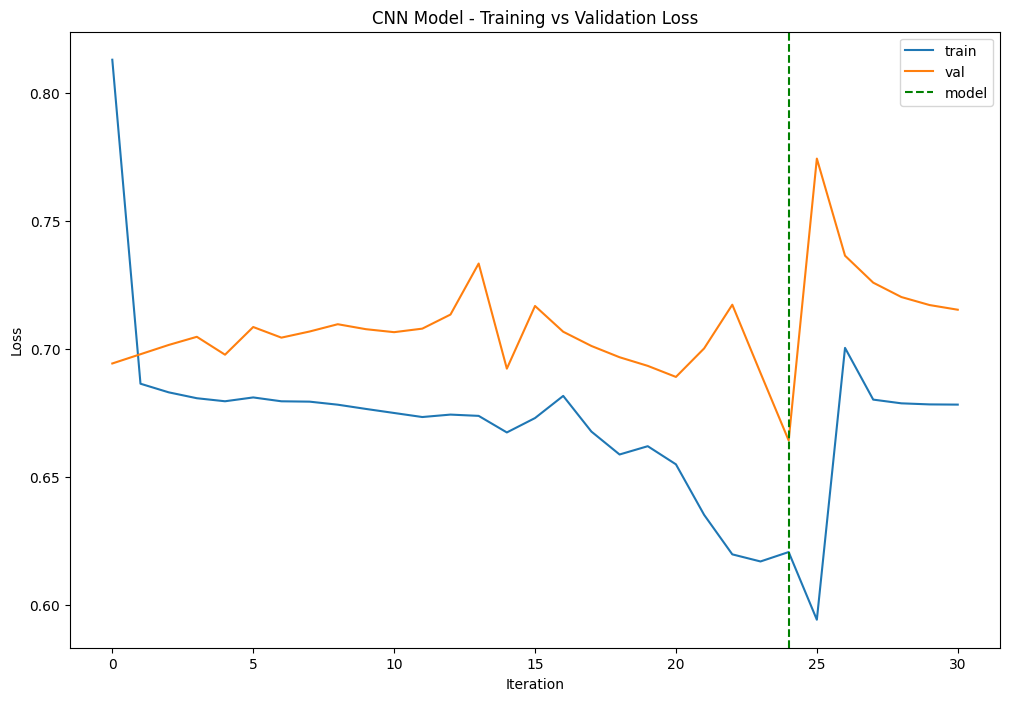

In [20]:
lowest = np.amin(cnn_history.history['val_loss'])
time = np.where(cnn_history.history['val_loss'] == lowest)


fig = plt.figure(figsize = (12,8))
fig = plt.plot(cnn_history.history['loss'])
fig = plt.plot(cnn_history.history['val_loss'])
fig = plt.axvline(x = time, color = 'green', linestyle = '--')
plt.title('CNN Model - Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['train', 'val', 'model'], loc='upper right')
plt.show()

### 2] Creating Proposed Model - 

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data/255,labels,test_size=0.3,random_state=101)

In [19]:
#Refrence- https://keras.io/guides/making_new_layers_and_models_via_subclassing/

class ProposedLayer(tf.keras.layers.Layer):
    def __init__(self, weight_matrix, kernel_size, **kwargs):
        # Store the weight matrix and kernel size as attributes of the class
        self.weight_matrix = weight_matrix
        self.kernel_size = kernel_size
        # Call the superclass constructor with any additional keyword arguments
        super(ProposedLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        # Initialize a large weight matrix with shape (kernel_size, kernel_size, input_channels, weight_matrix)
        self.kernel = self.add_weight(name='kernel',
                                      shape=(self.kernel_size, self.kernel_size, input_shape[-1], self.weight_matrix),
                                      initializer='glorot_uniform',
                                      trainable=True)
        # Call the superclass build method to finalize the build process
        super(ProposedLayer, self).build(input_shape)

    def compute(self,rf,x):
        # Perform a convolution with stride 1 and same padding 
        #Using tf.nn.conv2d which computes a 2-D convolution given input and 4-D filters tensors.
        #Refrence- https://www.tensorflow.org/api_docs/python/tf/nn/conv2d
        convolution = tf.nn.conv2d(x, rf, strides=[1, 1, 1, 1], padding='SAME')
        return convolution

    #Ref: https://stackoverflow.com/questions/61390089/ignoring-layers-with-arguments-in-init-must-override-get-config
    def get_config(self):
        cfg = super().get_config()
        return cfg 

    def call(self, x):
        # Select receptive fields from the weight matrix
        output = []
        for i in range(self.weight_matrix):
            # Slice out a receptive field of shape (kernel_size, kernel_size, input_channels, 1)
            receptive_fields = tf.slice(self.kernel, [0, 0, 0, i], [-1, -1, -1, 1])
            output.append(self.compute(receptive_fields,x))
        
        # Concatenate the output feature maps along the last dimension
        concat_layer = tf.keras.layers.Concatenate(axis=-1)
        output = concat_layer(output)
        
        return output

In [23]:
# Define the list of layers
my_layers = [
    Input(shape=(320, 320, 3)),
    ProposedLayer(weight_matrix=16, kernel_size=3),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)),
    ProposedLayer(weight_matrix=12, kernel_size=3),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)),
    ProposedLayer(weight_matrix=8, kernel_size=3),
    ReLU(),
    Flatten(),
    Dense(64),
    ReLU(),
    Dense(1, activation='sigmoid')
]

# Create the Sequential model
proposed_model = Sequential(my_layers)

# Print the summary of the model
proposed_model.summary()

# Compile the model
proposed_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), 
                       loss = tf.keras.losses.BinaryCrossentropy(), 
                       metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 proposed_layer (ProposedLay  (None, 320, 320, 16)     432       
 er)                                                             
                                                                 
 re_lu (ReLU)                (None, 320, 320, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 160, 160, 16)     0         
 2D)                                                             
                                                                 
 proposed_layer_1 (ProposedL  (None, 160, 160, 12)     1728      
 ayer)                                                           
                                                                 
 re_lu_1 (ReLU)              (None, 160, 160, 12)      0         
                                                      

In [27]:
# Train the model
Early_stopping = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience=10, 
                               restore_best_weights=True)

In [ ]:
my_history_early = proposed_model.fit(X_train1, y_train1, batch_size=32, epochs=500, 
                     validation_split=0.2, callbacks=[Early_stopping, tensorboard_callback], shuffle = False)

In [25]:
# Evaluate the model
my_test_loss, my_test_accuracy = proposed_model.evaluate(X_test1, y_test1)
print("Test Loss:" ,my_test_loss ,"," ,"Test Accuracy:",my_test_accuracy)

4/4 [==============================] - 1s 134ms/step - loss: 0.6840 - accuracy: 0.5354
Test Loss: 0.6840275526046753 , Test Accuracy: 0.5353535413742065


In [26]:
proposed_model_predictions = proposed_model.predict(X_test)
proposed_model_predictions = np.where(proposed_model_predictions >= 0.5, 1, 0)

4/4 [==============================] - 1s 127ms/step


In [27]:
print(classification_report(y_test1,proposed_model_predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.29      0.41        56
         1.0       0.48      0.86      0.62        43

    accuracy                           0.54        99
   macro avg       0.60      0.57      0.51        99
weighted avg       0.62      0.54      0.50        99



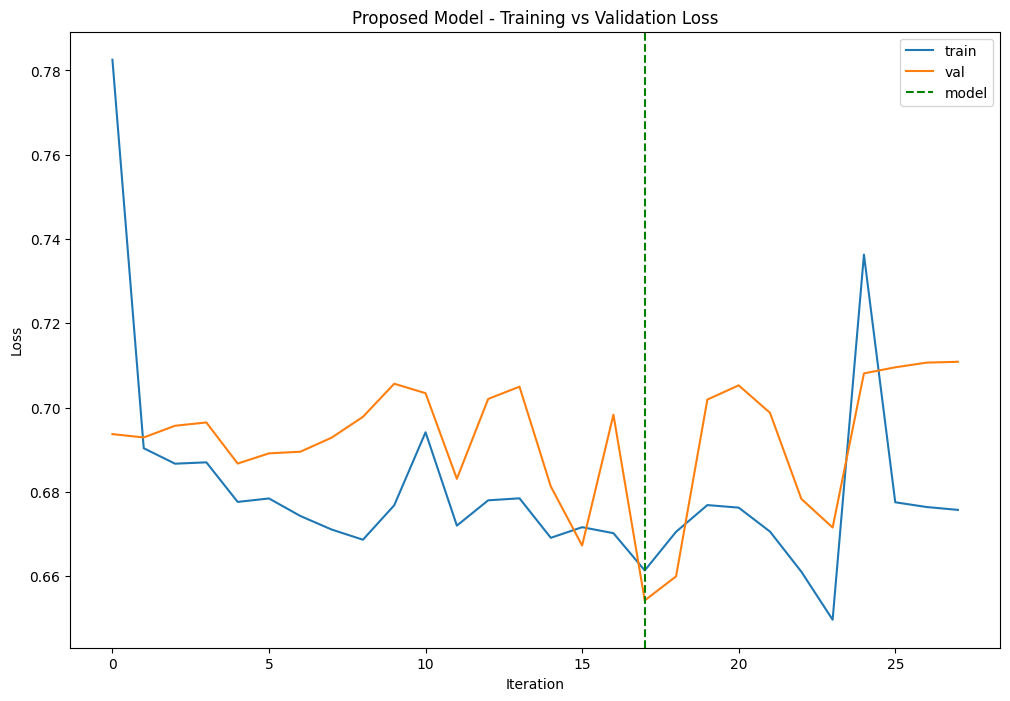

In [28]:
lowest = np.amin(my_history_early.history['val_loss'])
time = np.where(my_history_early.history['val_loss'] == lowest)


fig = plt.figure(figsize = (12,8))
fig = plt.plot(my_history_early.history['loss'])
fig = plt.plot(my_history_early.history['val_loss'])
fig = plt.axvline(x = time, color = 'green', linestyle = '--')
plt.title('Proposed Model - Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(['train', 'val', 'model'], loc='upper right')
plt.show()

# TensorBoard
### Showing how the Proposed Model's gradients and hyperparameters are changing with time.

In [29]:
%tensorboard --logdir logs/fit

# Hyperparameter tuning for Proposed Model

In [30]:
import itertools

In [31]:
#Ref: https://www.linkedin.com/pulse/solving-out-memory-oom-errors-keras-tensorflow-running-wayne-cheng/
'''
This code is taken from the above reference, and is 
used to dynamically allocate memory to GPU making it
available for each tensorflow operation. This code is
making sure the below code runs without issues.
'''

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [32]:
def build_model(lr, opt_val):
    my_layers = [
        Input(shape=(320, 320, 3)),
        ProposedLayer(weight_matrix=16, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        ProposedLayer(weight_matrix=12, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        ProposedLayer(weight_matrix=8, kernel_size=3),
        ReLU(),
        Flatten(),
        Dense(64),
        ReLU(),
        Dense(1, activation='sigmoid')
    ]

    # Create the Sequential model
    hp_model = Sequential(my_layers)

    # Check for model optimizer and add that
    if opt_val == 'SGD':
        opt_val = tf.keras.optimizers.SGD(learning_rate = lr)
    elif opt_val == 'Adam':
        opt_val = tf.keras.optimizers.Adam(learning_rate = lr)
    
    # Compile the model
    hp_model.compile(optimizer = opt_val, 
                        loss = tf.keras.losses.BinaryCrossentropy(), 
                        metrics = ['accuracy'])
    
    return hp_model

In [33]:
results = pd.DataFrame(columns = ["Optimizer Name", "Learning Rate", "Batch Size", 
                                  "Training Accuracy", "Training Loss", "Validation Accuracy", "Validation Loss"])

In [34]:
batch_sizes = [8, 16, 32]
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['SGD', 'Adam']

for batch, lr, opt_val in itertools.product(batch_sizes, learning_rates, optimizers):
        print(f"\n Training with Batch size: {batch}, Learning Rate: {lr} & Optimizer: {opt_val}")
        hp_model = build_model(lr, opt_val)
        hp_history = hp_model.fit(X_train1, y_train1, batch_size=batch, epochs=500, 
                        validation_split=0.2, callbacks=[Early_stopping], 
                        shuffle = False, verbose = 0)
        
        
        val_loss = np.amin(hp_history.history['val_loss'])
        val_auc = np.amax(np.where(hp_history.history['val_loss'] == val_loss, hp_history.history['val_accuracy'], 0))
        train_loss = np.amax(np.where(hp_history.history['val_loss'] == val_loss, hp_history.history['loss'], 0))
        train_auc = np.amax(np.where(hp_history.history['val_loss'] == val_loss, hp_history.history['accuracy'], 0))


        row = {"Optimizer Name" : opt_val, "Learning Rate" : lr, "Batch Size" : batch, 
                "Training Accuracy" : train_auc, "Training Loss" : train_loss, 
                "Validation Accuracy" : val_auc, "Validation Loss" : val_loss}

       
        results = results.append(row, ignore_index = True)
    


 Training with Batch size: 8, Learning Rate: 0.1 & Optimizer: SGD

 Training with Batch size: 8, Learning Rate: 0.1 & Optimizer: Adam

 Training with Batch size: 8, Learning Rate: 0.01 & Optimizer: SGD

 Training with Batch size: 8, Learning Rate: 0.01 & Optimizer: Adam

 Training with Batch size: 8, Learning Rate: 0.001 & Optimizer: SGD

 Training with Batch size: 8, Learning Rate: 0.001 & Optimizer: Adam

 Training with Batch size: 16, Learning Rate: 0.1 & Optimizer: SGD

 Training with Batch size: 16, Learning Rate: 0.1 & Optimizer: Adam

 Training with Batch size: 16, Learning Rate: 0.01 & Optimizer: SGD

 Training with Batch size: 16, Learning Rate: 0.01 & Optimizer: Adam

 Training with Batch size: 16, Learning Rate: 0.001 & Optimizer: SGD

 Training with Batch size: 16, Learning Rate: 0.001 & Optimizer: Adam

 Training with Batch size: 32, Learning Rate: 0.1 & Optimizer: SGD

 Training with Batch size: 32, Learning Rate: 0.1 & Optimizer: Adam

 Training with Batch size: 32, Lea

In [42]:
hp_results = results.sort_values(['Optimizer Name','Learning Rate'])
hp_results = hp_results.set_index(['Optimizer Name'])
hp_results

,Learning Rate,Batch Size,Training Accuracy,Training Loss,Validation Accuracy,Validation Loss
Optimizer Name,,,,,,
Adam,0.001,8,0.461538,0.897826,0.478261,0.693219
Adam,0.001,16,0.835165,0.423753,0.630435,0.592494
Adam,0.001,32,0.956044,0.201848,0.673913,0.587702
Adam,0.010,8,0.769231,0.479022,0.543478,0.628552
Adam,0.010,16,0.587912,0.683627,0.478261,0.695873
Adam,0.010,32,0.549451,4.172065,0.500000,0.692603
Adam,0.100,8,0.587912,0.680872,0.478261,0.712323
Adam,0.100,16,0.587912,0.678588,0.478261,0.696877
Adam,0.100,32,0.494505,18540.005859,0.500000,0.690041


### Extending the model

In [22]:
#Extended Layers
ext_layers = [
        Input(shape=(320, 320, 3)),
        ProposedLayer(weight_matrix=32, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        ProposedLayer(weight_matrix=18, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        ProposedLayer(weight_matrix=16, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        ProposedLayer(weight_matrix=12, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        ProposedLayer(weight_matrix=8, kernel_size=3),
        ReLU(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(64),
        ReLU(),
        Dense(1, activation='sigmoid')
    ]

# Create the Extended Sequential model
ext_model = Sequential(ext_layers)

In [34]:
ext_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 proposed_layer_10 (Proposed  (None, 320, 320, 32)     864       
 Layer)                                                          
                                                                 
 re_lu_14 (ReLU)             (None, 320, 320, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 160, 160, 32)     0         
 g2D)                                                            
                                                                 
 proposed_layer_11 (Proposed  (None, 160, 160, 18)     5184      
 Layer)                                                          
                                                                 
 re_lu_15 (ReLU)             (None, 160, 160, 18)      0         
                                                        

In [23]:
ext_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), 
                        loss = tf.keras.losses.BinaryCrossentropy(), 
                        metrics = ['accuracy'])

In [32]:
ext_history = ext_model.fit(X_train1, y_train1, batch_size = 16, epochs=500, 
                        validation_split=0.2, callbacks=[Early_stopping], 
                        shuffle = False, verbose = 1)

Epoch 1/500
12/12 [==============================] - 6s 540ms/step - loss: 0.6880 - accuracy: 0.5879 - val_loss: 0.6943 - val_accuracy: 0.4783
Epoch 2/500
12/12 [==============================] - 6s 529ms/step - loss: 0.6876 - accuracy: 0.5879 - val_loss: 0.6944 - val_accuracy: 0.4783
Epoch 3/500
12/12 [==============================] - 6s 528ms/step - loss: 0.6872 - accuracy: 0.5879 - val_loss: 0.6946 - val_accuracy: 0.4783
Epoch 4/500
12/12 [==============================] - 6s 529ms/step - loss: 0.6868 - accuracy: 0.5879 - val_loss: 0.6947 - val_accuracy: 0.4783
Epoch 5/500
12/12 [==============================] - 6s 528ms/step - loss: 0.6864 - accuracy: 0.5879 - val_loss: 0.6949 - val_accuracy: 0.4783
Epoch 6/500
12/12 [==============================] - 6s 531ms/step - loss: 0.6861 - accuracy: 0.5879 - val_loss: 0.6951 - val_accuracy: 0.4783
Epoch 7/500
12/12 [==============================] - 6s 532ms/step - loss: 0.6857 - accuracy: 0.5879 - val_loss: 0.6952 - val_accuracy: 0.4783

In [36]:
val_loss = np.amin(ext_history.history['val_loss'])
train_loss = np.amax(np.where(ext_history.history['val_loss'] == val_loss, ext_history.history['loss'], 0))

print(f'Training Loss: {train_loss}, Validation Loss: {val_loss}')

Training Loss: 0.6879586577415466, Validation Loss: 0.6942780613899231
